In [1]:
import numpy as np
from manifold import *
from plotting import *
import matplotlib.pyplot as plt

# Measure inaccuracy of the retraction as function of point distance from the basepoint

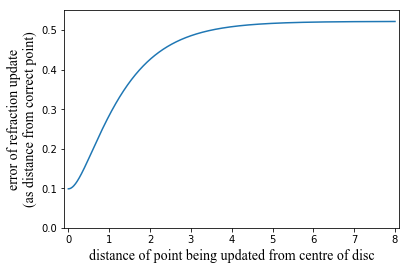

In [2]:
dirnx = coordinate_vector(0, 3)
dirny = coordinate_vector(1, 3)
basept = coordinate_vector(2, 3)

tangent = dirny
discrepancies = []
pt_dists = np.linspace(0, 8, 1000)
for pt_dist in pt_dists:
    pt = exponential(basept, pt_dist * dirnx)
    discrepancies.append(distance(exponential(pt, tangent), retraction(pt, tangent)))

plt.figure(figsize=(6, 4))
plt.plot(pt_dists, discrepancies)
label_args = dict(fontsize=14, fontname='Times New Roman')
plt.xlabel('distance of point being updated from centre of disc', **label_args)
plt.ylabel('error of refraction update\n(as distance from correct point)', **label_args)
plt.xlim(-0.1, 8.1)
plt.ylim(0, 0.55)
plt.savefig('/Users/benjaminwilson/optimisation-on-the-hyperboloid/retraction_error.pdf',
            bbox_inches='tight',
            format='pdf')
plt.show()

**Notice that the error at distance 0 is not zero.**  This is because the retraction updates do not correctly measure the step size, i.e. a unit step via a retraction update steps a distance that differs from 1.  Illustrated below:

Text(0.5,1,'updates to centre pt for 10 evenly spaced\nsteps of size 0 to 2.00')

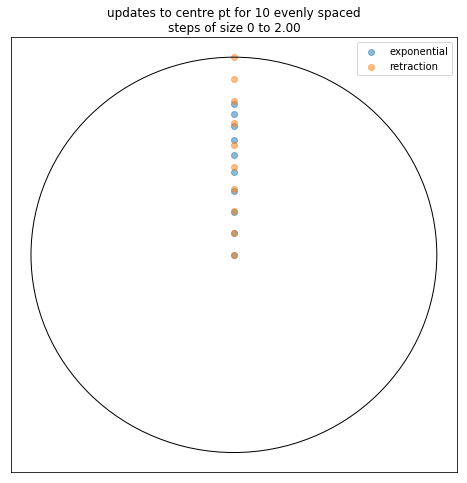

In [3]:
fig, ax = plot_disc()
max_step = 2
steps = 10
stepsizes = np.linspace(0, max_step, steps)
ppts_exponential = np.array([to_poincare_ball_point(exponential(basept, s * dirny)) for s in stepsizes])
ppts_retraction = np.array([to_poincare_ball_point(retraction(basept, s * dirny)) for s in stepsizes])
ax.scatter(ppts_exponential[:,0], ppts_exponential[:,1], label='exponential', alpha=0.5)
ax.scatter(ppts_retraction[:,0], ppts_retraction[:,1], label='retraction', alpha=0.5)
ax.legend()
ax.set_title('updates to centre pt for %i evenly spaced\nsteps of size 0 to %.2f' % (steps, max_step))